A Machine Learning Project may not be linear, but it has a number of well known steps:
1.Define Problem.
2.Prepare Data.
3.Evaluate Algorithms.
4.Improve Results.
5.Present Results.

In this section, we are going to work through a small machine learning project end-to-end.

Here is an overview of what we are going to cover:

1.Installing the Python and SciPy platform.
2.Loading the dataset.
3.Summarizing the dataset.
4.Evaluating some algorithms.
5.Making some predictions.

1.Downloading, Installing and Starting Python SciPy

In [226]:
# from xml.dom import minidom
import numpy as np
import pandas
import csv
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

2. Load The Data

In [247]:
#Load dataset
url ='dataset/LaneClosure/L10130/2 s interval(including2hops)/1,2,3 close/L30.csv'
names = ["Time","Edge ID","Edge Length","NumberOfLane","Lane Name","Jam Length","Density","Mean Speed","Mean Occupancy","Flow","Road State(basedOnJamLength)","Road State(basedOnFlow)"]
dataset = pandas.read_csv(url, names=names,skiprows=1)

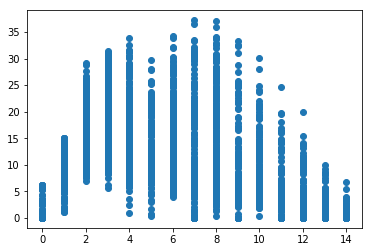

In [248]:
plt.scatter(dataset['Flow'], dataset['Mean Speed'])

In [249]:
# class distribution
dataset.groupby('Road State(basedOnFlow)').head()


,Time,Edge ID,Edge Length,NumberOfLane,Lane Name,Jam Length,Density,Mean Speed,Mean Occupancy,Flow,Road State(basedOnJamLength),Road State(basedOnFlow)
0,06:00:02,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,0,-0.0000,0.0000,0,0,0
1,06:00:04,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,0,-0.0000,0.0000,0,0,0
2,06:00:06,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,0,-0.0000,0.0000,0,0,0
3,06:00:08,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,0,-0.0000,0.0000,0,0,0
4,06:00:10,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,0,-0.0000,0.0000,0,0,0
157,06:05:16,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,1,14.7125,4.7050,1,0,1
159,06:05:20,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,2,20.0775,5.5900,2,0,1
186,06:06:14,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,2,16.5750,5.3700,2,0,1
187,06:06:16,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,2,28.8150,6.2275,2,0,1
213,06:07:08,L30,99.68,4,"L30_3,L30_2,L30_1,L30_0",0.0,2,13.9000,5.3000,2,0,1


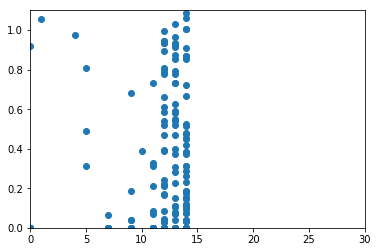

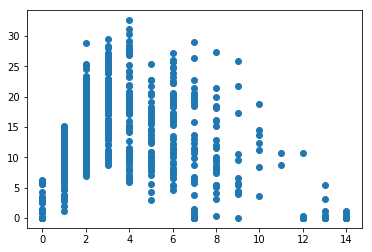

In [250]:
abnormalcase = dataset.loc[dataset['Road State(basedOnFlow)']==1];
normalcase = dataset.loc[dataset['Road State(basedOnFlow)']==0];

plt.scatter(normalcase['Flow'], normalcase['Mean Speed']);
plt.xlim(0,30); plt.ylim(0,1.1)
plt.figure(); plt.scatter(abnormalcase['Flow'], abnormalcase['Mean Speed']);

3.In this step we are going to take a look at the data a few different ways:

Dimensions of the dataset.
Peek at the data itself.
Statistical summary of all attributes.
Breakdown of the data by the class variable.

In [251]:
# descriptions
print(dataset.describe())

        Edge Length  NumberOfLane   Jam Length      Density   Mean Speed  \
count  5.401000e+03        5401.0  5401.000000  5401.000000  5401.000000   
mean   9.968000e+01           4.0    13.318545     3.985743    12.447743   
std    4.590531e-12           0.0    25.473387     3.799462     7.338071   
min    9.968000e+01           4.0     0.000000     0.000000    -0.000000   
25%    9.968000e+01           4.0     0.000000     2.000000     7.335000   
50%    9.968000e+01           4.0     0.000000     2.000000    12.625000   
75%    9.968000e+01           4.0    11.625000     6.000000    17.315000   
max    9.968000e+01           4.0    98.912500    14.000000    37.195000   

       Mean Occupancy         Flow  Road State(basedOnJamLength)  \
count     5401.000000  5401.000000                   5401.000000   
mean        16.215674     3.985743                      0.080541   
std         17.368381     3.799462                      0.306704   
min          0.000000     0.000000         

In [252]:
# class distribution
print(dataset.groupby('Road State(basedOnFlow)').size())

Road State(basedOnFlow)
0    3505
1    1896
dtype: int64


4. Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:

Separate out a validation dataset.
Set-up the test harness to use 10-fold cross validation.
Build 5 different models to predict species from flower measurements
Select the best model.

In [253]:
# Split-out validation dataset
array = dataset.values
X = array[:,[7,9]]

Y = array[:,11]
Y=Y.astype('int')

validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print(X)

[[-0.0 0]
 [-0.0 0]
 [-0.0 0]
 ...
 [14.1875 1]
 [15.4675 2]
 [10.6825 1]]


In [254]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [255]:
# Spot Check Algorithms
models=[]

svc = SVC(kernel='rbf', C=1,gamma='auto').fit(X_train, Y_train)

models.append(('SVM', svc))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(svc, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

SVM: 0.729630 (0.021058)


5.Make Predictions

Accuracy : 0.7199259716224553


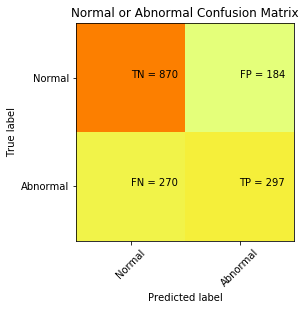

In [256]:
# Make predictions on validation dataset
predictions = svc.predict(X_validation)
print('Accuracy :',accuracy_score(Y_validation, predictions))
cm=confusion_matrix(Y_validation, predictions)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Normal','Abnormal']
plt.title('Normal or Abnormal Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()


In [ ]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 0, X[:, 0].max() + 0
y_min, y_max = X[:, 1].min() - 0, X[:, 1].max() + 0
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

In [ ]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Mean Speed')
plt.ylabel('Flow')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with RBF kernel')
plt.show()